In [1881]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('preu lloguer per trimestre i barri.csv')

df

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


En este dataframe podemos encontrar el precio del alquiler medio, tanto mensualmente como por metro cuadrado, en los diferentes barrios y distritos de la ciudad de Barcelona a lo largo de los cuatro trimestres de 2021.

Al haber dos tipos de medida, Euros/mes y Euros/m2 mes, tendremos que trabajar con ambas de manera independiente, ya que nos falta información para poder convertirlas a la misma unidad y trabajar conjuntamente.

In [1882]:
df.dtypes

Any                int64
Trimestre          int64
Codi_Districte     int64
Nom_Districte     object
Codi_Barri         int64
Nom_Barri         object
Lloguer_mitja     object
Preu              object
dtype: object

Por otro lado, al ejecutar la función df.dtypes vemos que la columna "Preu" no es numérica, por lo que antes tendremos que proceder a cambiar el tipo de dato a float64.

Sin embargo, al tratar de convertirla directamente, por ejemplo con la función "astype(float)", obtenemos el siguiente error:

    - ValueError: could not convert string to float: '--'

Esto significa que no todos los valores en la columna "Preu" son numéricos, sino que también hay strings, por lo que no puede proceder a realizar la conversión del tipo de dato.

Al hacer una búsqueda específica con la información que nos da el error obtenemos lo siguiente:

In [1883]:
df_missing = df.loc[df['Preu'] == '--']
df_missing

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
11,2021,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),--
41,2021,1,7,Horta-Guinardó,42,la Clota,Lloguer mitjà mensual (Euros/mes),--
46,2021,1,8,Nou Barris,47,Can Peguera,Lloguer mitjà mensual (Euros/mes),--
53,2021,1,8,Nou Barris,54,Torre Baró,Lloguer mitjà mensual (Euros/mes),--
55,2021,1,8,Nou Barris,56,Vallbona,Lloguer mitjà mensual (Euros/mes),--
57,2021,1,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà mensual (Euros/mes),--
84,2021,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà per superfície (Euros/m2 mes),--
114,2021,1,7,Horta-Guinardó,42,la Clota,Lloguer mitjà per superfície (Euros/m2 mes),--
119,2021,1,8,Nou Barris,47,Can Peguera,Lloguer mitjà per superfície (Euros/m2 mes),--
126,2021,1,8,Nou Barris,54,Torre Baró,Lloguer mitjà per superfície (Euros/m2 mes),--


Se trata de 44 registros que disponen de un objeto no numérico, por lo que tendremos que pasarlos a tipo NaN para acto seguido eliminarlos y continuar con las consultas con una versión reducida del data frame.

En este caso, parece que la mejor opción es elimnar todas las entradas en las que no tenemos un valor en la columna 'Precio', ya que todos los registros forman parte de barrios de los que no tenemos ningún dato, como podemos ver en la siguiente búsqueda por la columna 'Codi_Barri'.

In [1884]:
df_test = df.loc[df['Codi_Barri'] == 12]
df_test

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
11,2021,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),--
84,2021,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà per superfície (Euros/m2 mes),--
157,2021,2,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),--
230,2021,2,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà per superfície (Euros/m2 mes),--
303,2021,3,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),--
376,2021,3,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà per superfície (Euros/m2 mes),--
449,2021,4,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),--
522,2021,4,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà per superfície (Euros/m2 mes),--


In [1885]:
#df = df['Preu'].apply(pd.to_numeric, errors='coerce') parece que también funciona correctamente

df.loc[df['Preu'] == '--', 'Preu'] = np.nan
pd.isnull(df).sum()

Any                0
Trimestre          0
Codi_Districte     0
Nom_Districte      0
Codi_Barri         0
Nom_Barri          0
Lloguer_mitja      0
Preu              44
dtype: int64

In [1886]:
print(df['Preu'].shape)
df = df.loc[~df['Preu'].isna()]
df['Preu'].shape

(584,)


(540,)

In [1887]:
df['Preu'] = df['Preu'].astype(float)
df.dtypes

Any                 int64
Trimestre           int64
Codi_Districte      int64
Nom_Districte      object
Codi_Barri          int64
Nom_Barri          object
Lloguer_mitja      object
Preu              float64
dtype: object

Una vez depurado el dataframe, obtenemos de la columna 'Lloguer_mitja' dos nuevas columnas a partir de la diferencia según 'Euros/m2 mes' y 'Euros/mes'.

Con cada una de estas columnas creamos dos nuevos dataframes.

In [1888]:
df['Lloguer_mitja_mensual'] = df['Lloguer_mitja'][df.Lloguer_mitja != 'Lloguer mitjà per superfície (Euros/m2 mes)']
df['Lloguer_mitja_superficie'] = df['Lloguer_mitja'][df.Lloguer_mitja != 'Lloguer mitjà mensual (Euros/mes)']

df_men = df[['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri',
         #'Lloguer_mitja',
         'Lloguer_mitja_mensual',
         #'Lloguer_mitja_superficie',
         'Preu']]

df_sup = df[['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri',
         #'Lloguer_mitja', 'Lloguer_mitja_mensual',
         'Lloguer_mitja_superficie', 'Preu']]

df_men = df_men.loc[~df_men['Lloguer_mitja_mensual'].isna()]
df_sup = df_sup.loc[~df_sup['Lloguer_mitja_superficie'].isna()]

df_sup

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja_superficie,Preu
73,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),12.8
74,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà per superfície (Euros/m2 mes),12.3
75,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà per superfície (Euros/m2 mes),15.5
76,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà per superfície (Euros/m2 mes),13.3
77,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà per superfície (Euros/m2 mes),12.9
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


Con estos dos dataframes, podemos proceder a realizar el ejercicio número uno.

Text(0.5, 1.0, 'Número de registros por distrito')

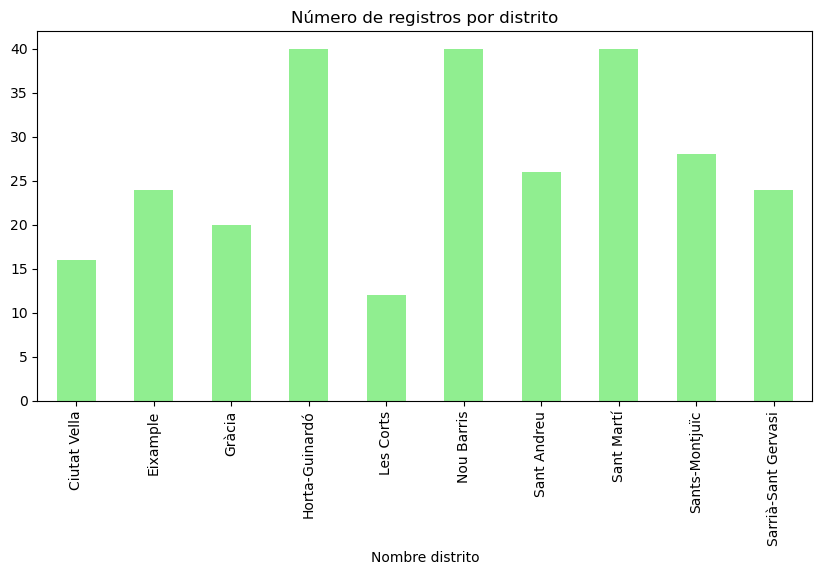

In [1889]:
df_men_dist = df_men.groupby(['Nom_Districte'])['Nom_Districte'].aggregate('count')

plt.figure().set_figwidth(10)

df_men_dist.plot.bar(xlabel='Nombre distrito', color=['lightgreen'])

plt.title('Número de registros por distrito')

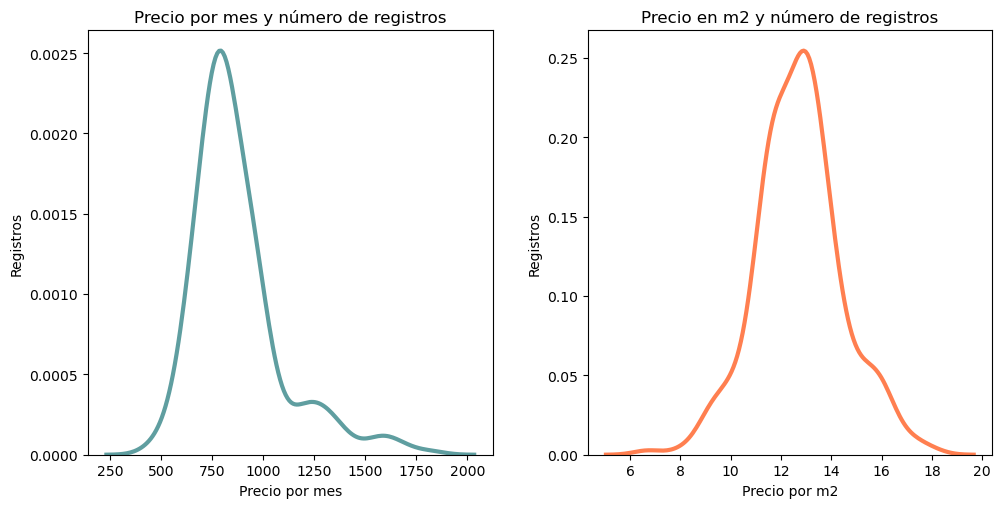

In [1890]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1, 2, 1)

sns.kdeplot(df_men['Preu'], color='cadetblue', lw=3)
plt.title('Precio por mes y número de registros')
plt.xlabel('Precio por mes')
plt.ylabel('Registros')

ax2 = fig.add_subplot(1, 2, 2)

sns.kdeplot(df_sup['Preu'], color='coral', lw=3)
plt.title('Precio en m2 y número de registros')
plt.xlabel('Precio por m2')
plt.ylabel('Registros')

plt.tight_layout(pad=0.4, w_pad=2.5, h_pad=1.0)
plt.savefig('Precio_y_Numero_Registros')

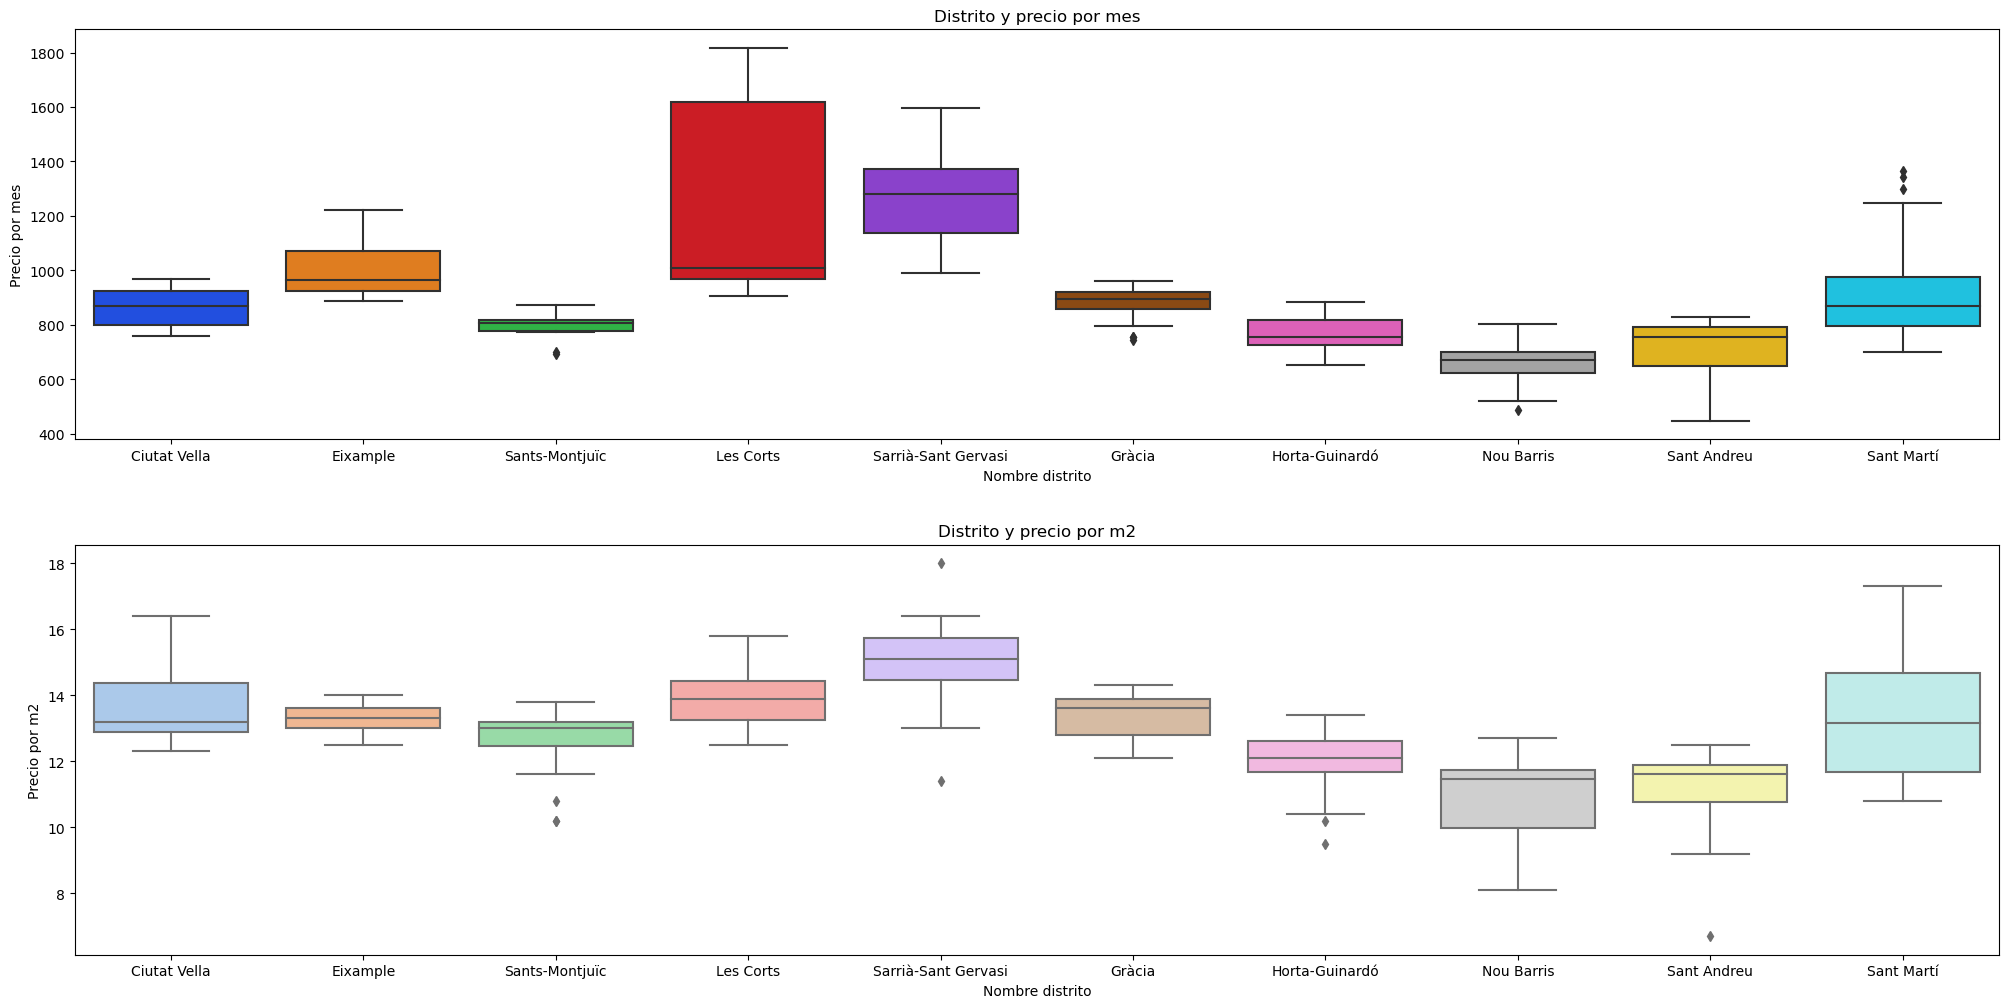

In [1891]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(2, 1, 1)

sns.boxplot(x=df_men['Nom_Districte'], y=df_men['Preu'], palette='bright')
plt.title('Distrito y precio por mes')
plt.xlabel('Nombre distrito')
plt.ylabel('Precio por mes')

ax2 = fig.add_subplot(2, 1, 2)

sns.boxplot(x=df_sup['Nom_Districte'], y=df_sup['Preu'], palette='pastel')
plt.title('Distrito y precio por m2')
plt.xlabel('Nombre distrito')
plt.ylabel('Precio por m2')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=3.0)
plt.savefig('Nombre_Distrito_y_Precio')

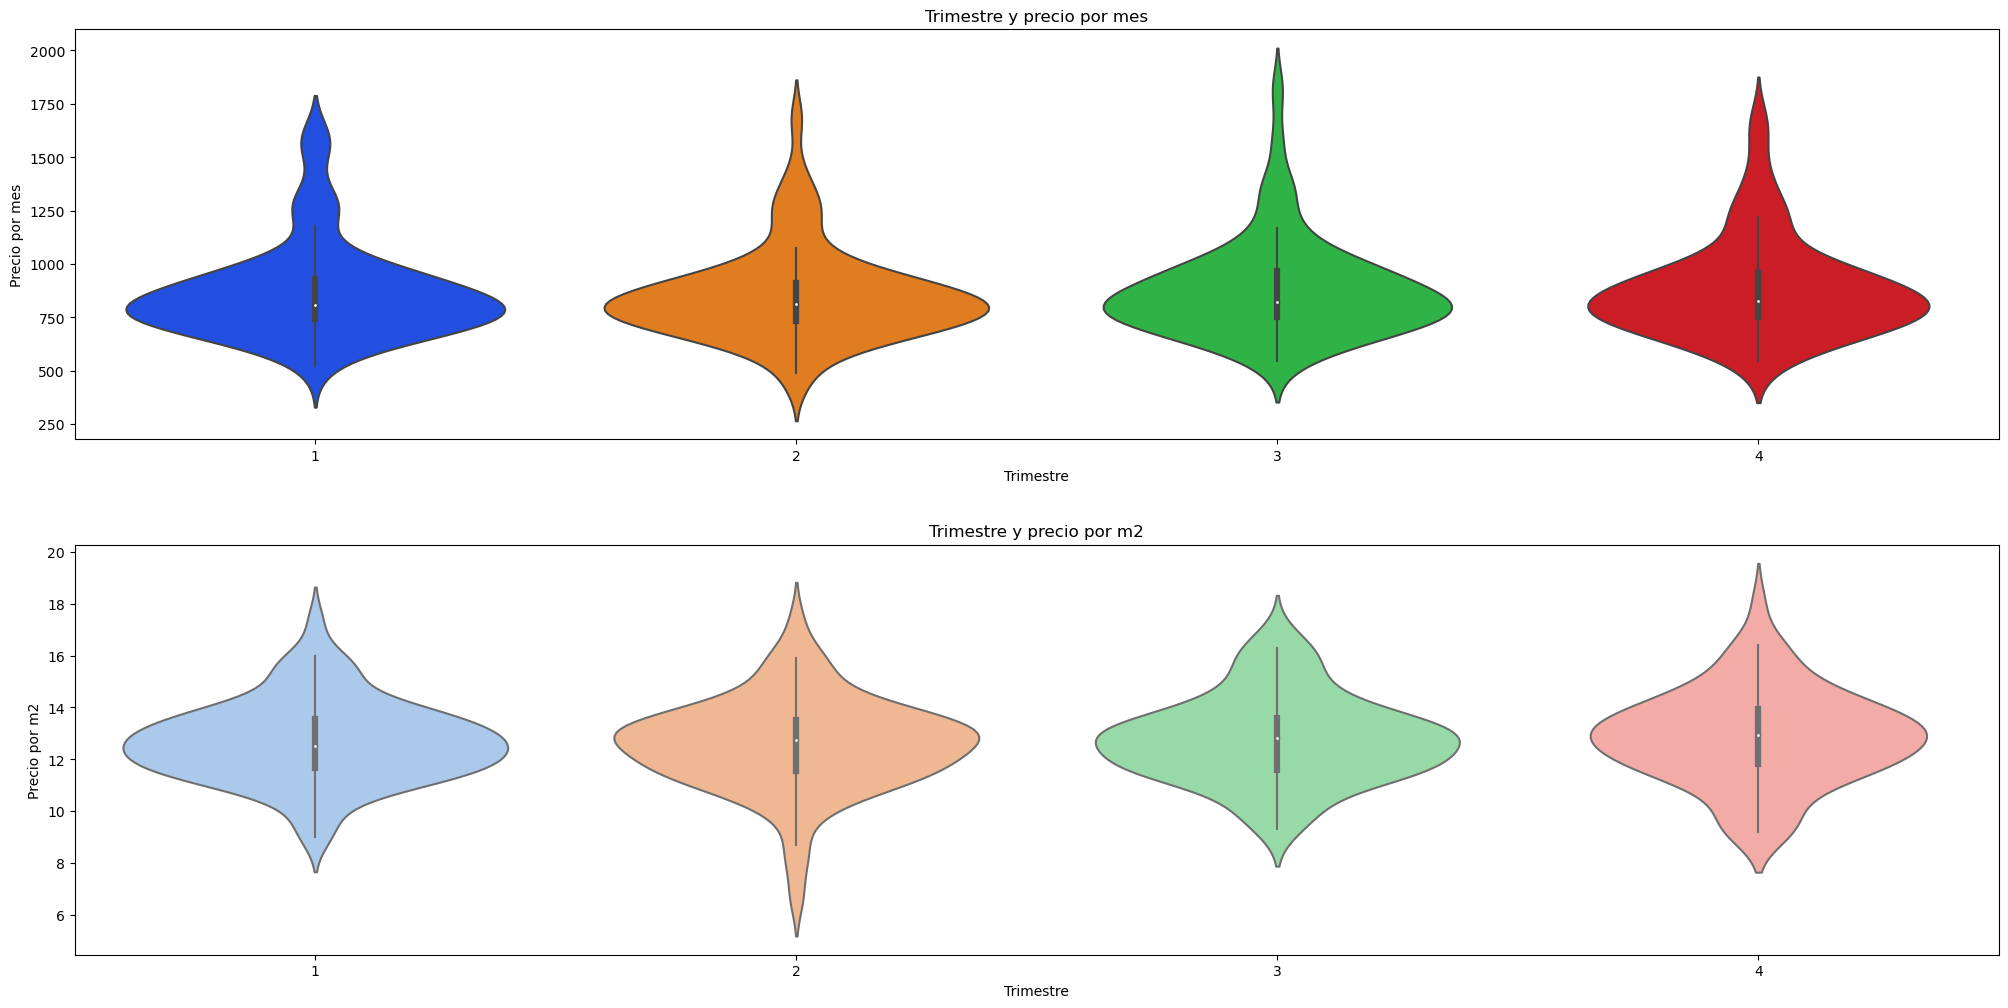

In [1892]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(2, 1, 1)

sns.violinplot(x=df_men['Trimestre'], y=df_men['Preu'], palette='bright')
plt.title('Trimestre y precio por mes')
plt.xlabel('Trimestre')
plt.ylabel('Precio por mes')

ax2 = fig.add_subplot(2, 1, 2)

sns.violinplot(x=df_sup['Trimestre'], y=df_sup['Preu'], palette='pastel')
plt.title('Trimestre y precio por m2')
plt.xlabel('Trimestre')
plt.ylabel('Precio por m2')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=3.0)
plt.savefig('Trimestre_y_Precio')

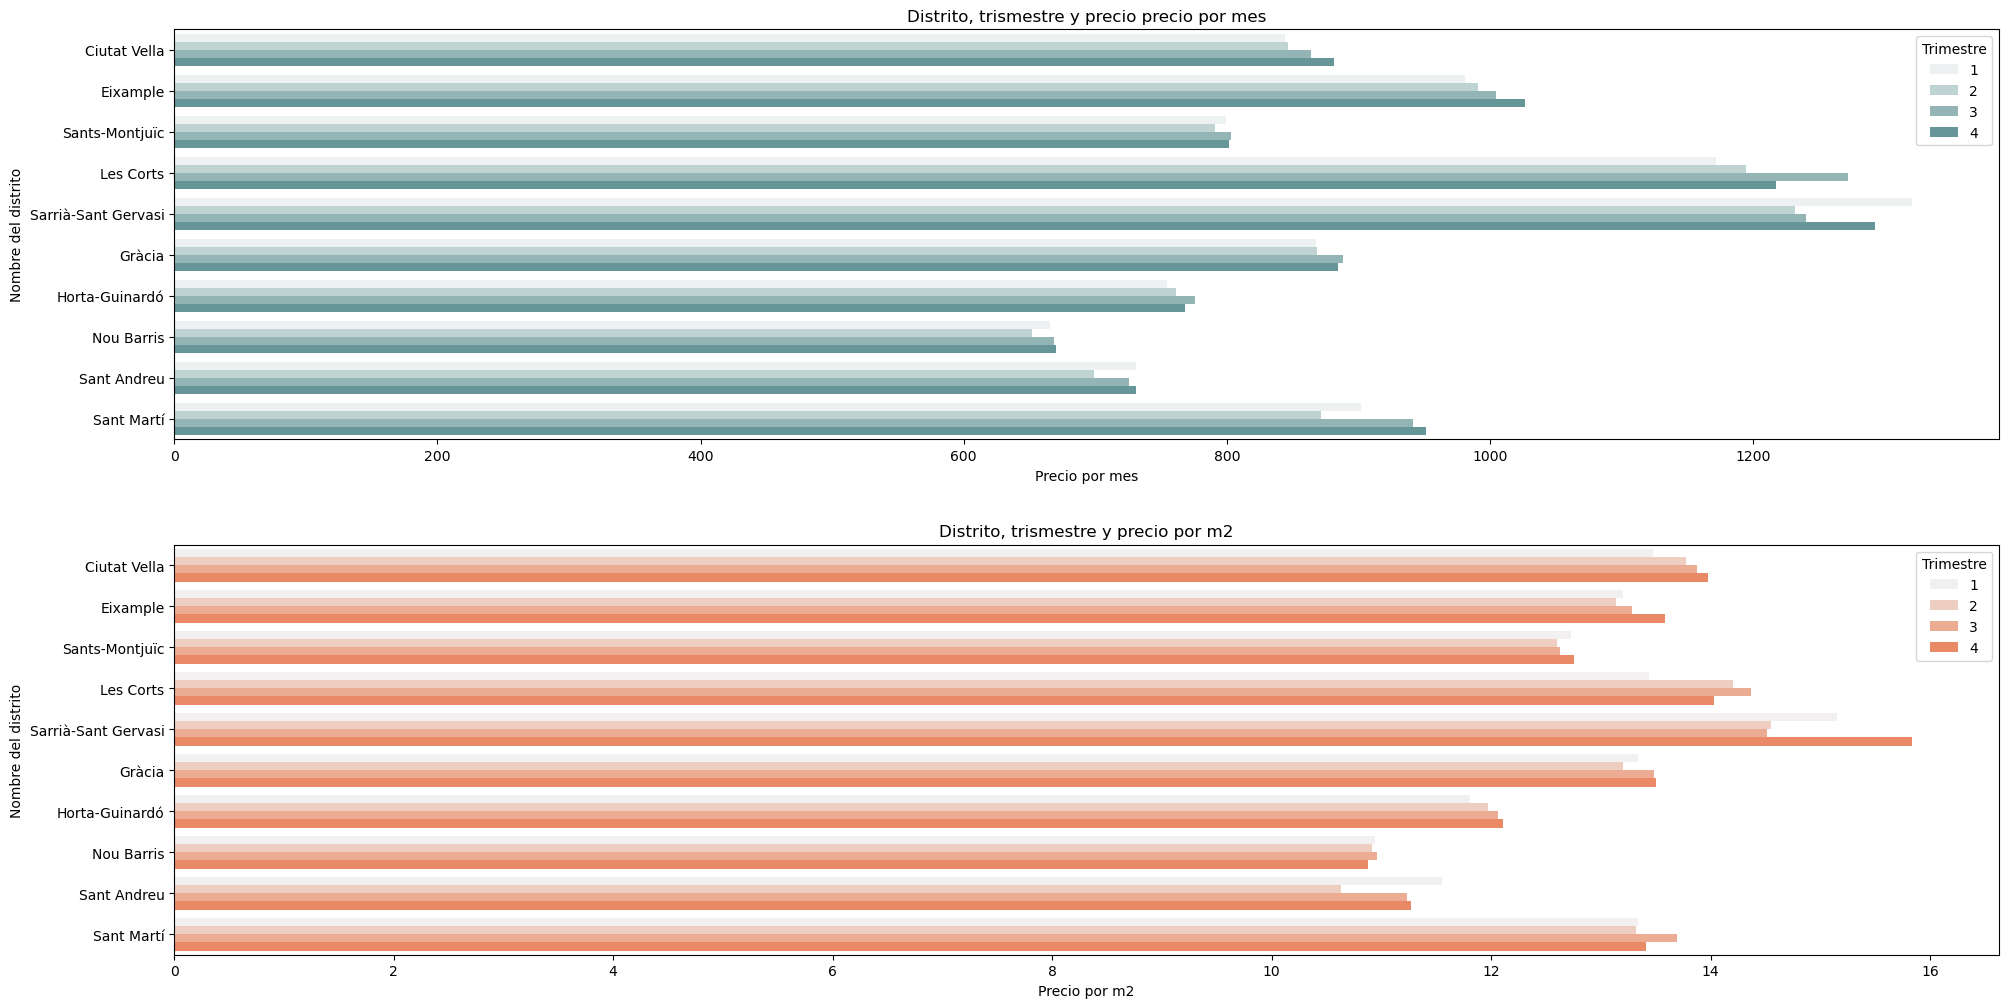

In [1893]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(2, 1, 1)

sns.barplot(x='Preu', y='Nom_Districte', hue='Trimestre', data=df_men, errorbar=None, color='cadetblue')
plt.title('Distrito, trismestre y precio precio por mes')
plt.xlabel('Precio por mes')
plt.ylabel('Nombre del distrito')

ax2 = fig.add_subplot(2, 1, 2)

sns.barplot(x='Preu', y='Nom_Districte', hue='Trimestre', data=df_sup, errorbar=None, color='coral')
plt.title('Distrito, trismestre y precio por m2')
plt.xlabel('Precio por m2')
plt.ylabel('Nombre del distrito')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=3.0)
plt.savefig('Nombre_Distrito_Precio_y_Trimestre')

<function matplotlib.pyplot.show(close=None, block=None)>

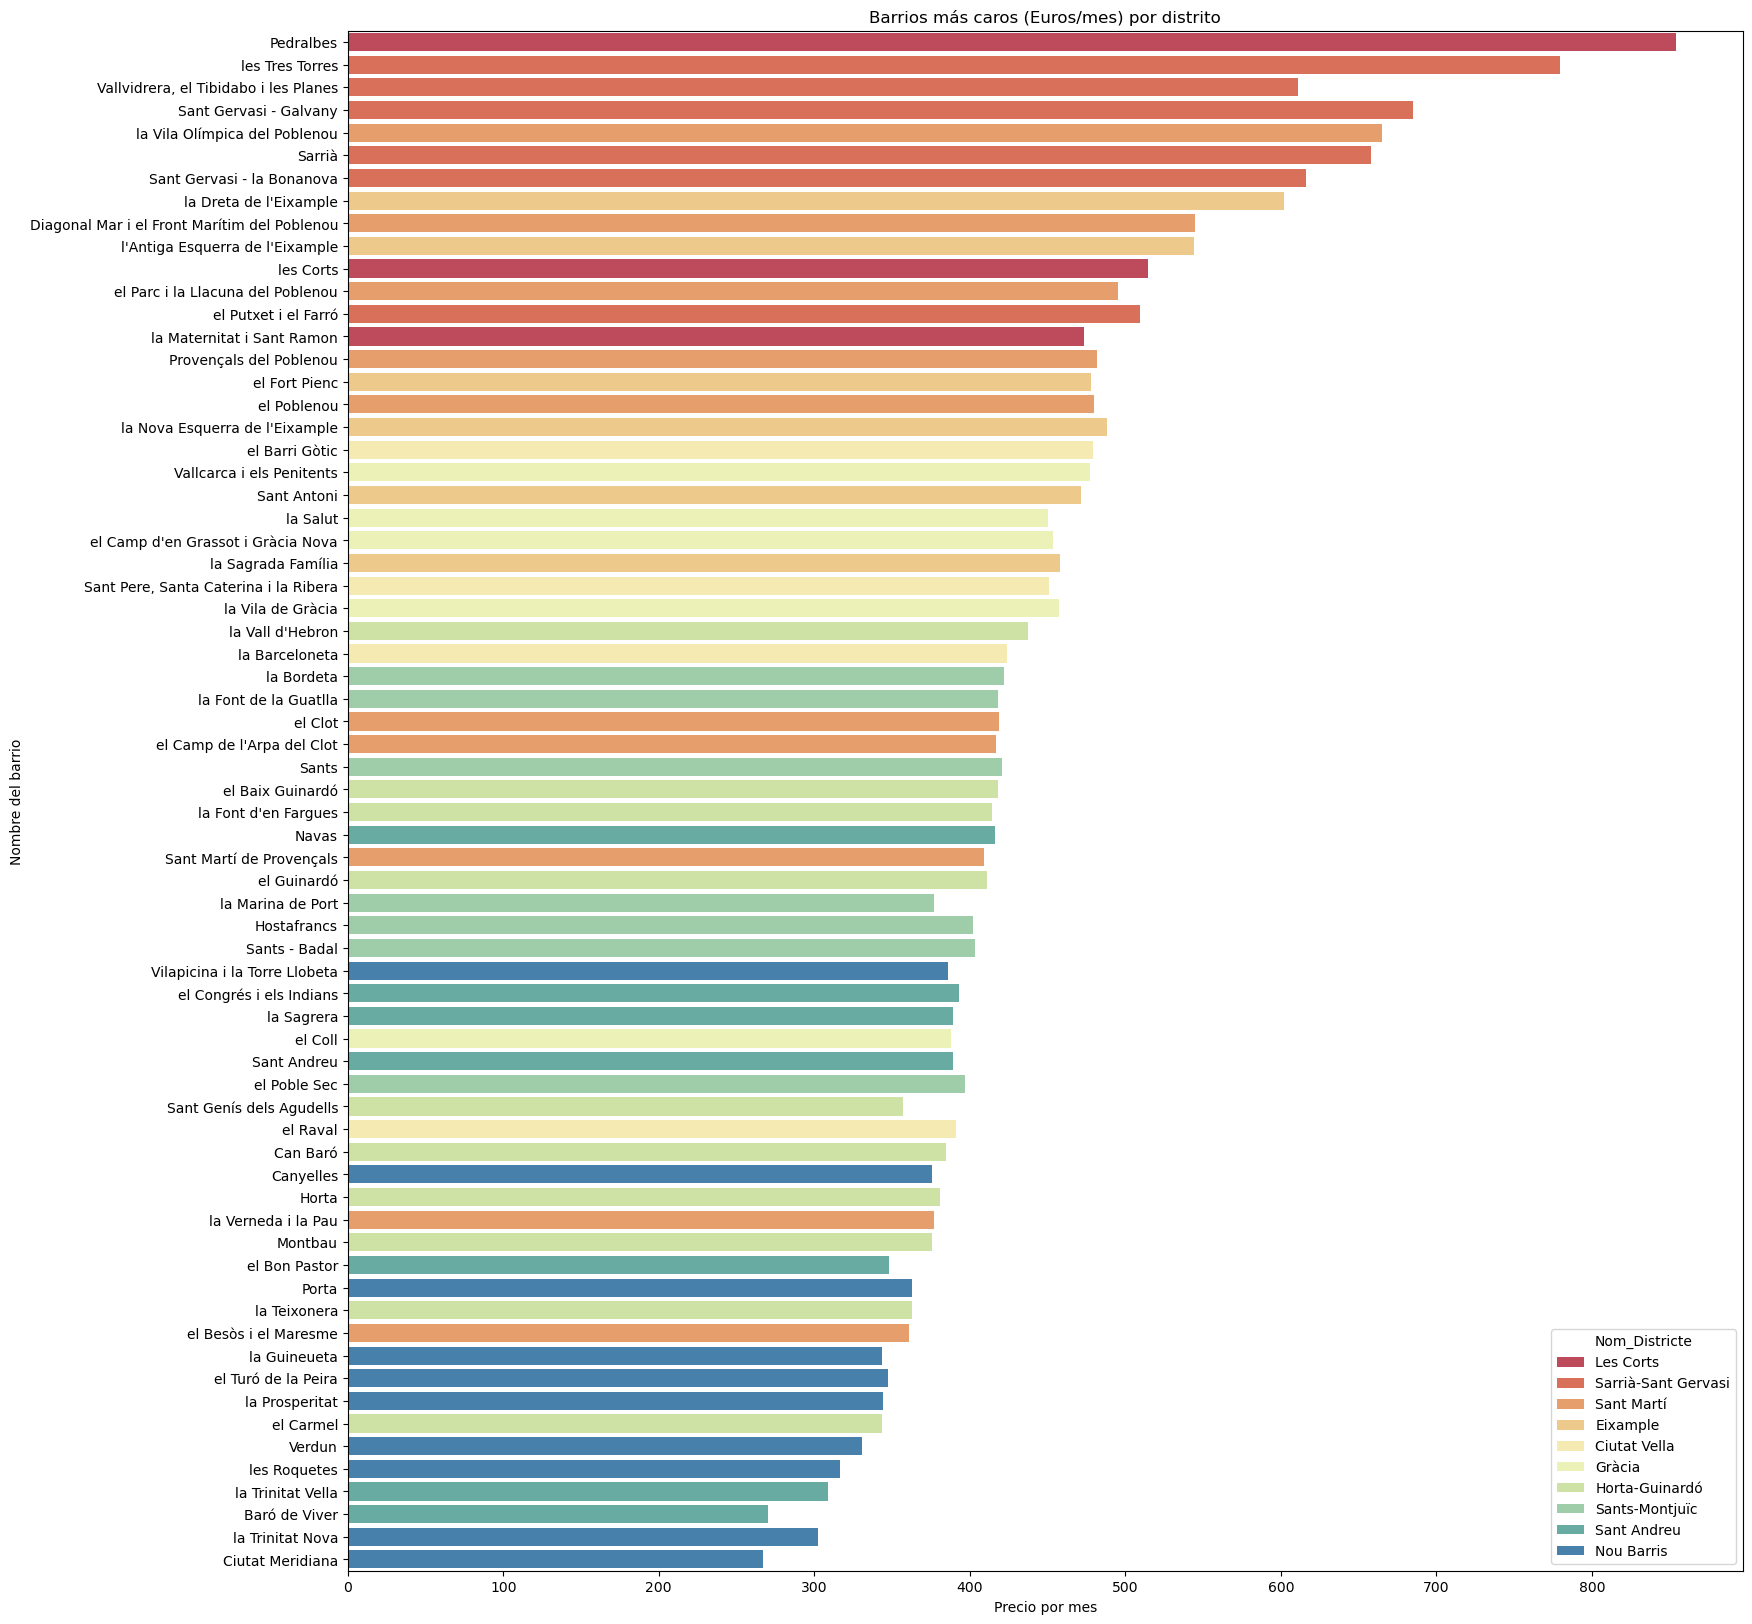

In [1895]:
df_men_new = df[[
         #'Any', 'Trimestre', 'Codi_Districte',
         'Nom_Districte',
         #'Codi_Barri',
         'Nom_Barri',
         #'Lloguer_mitja', 'Lloguer_mitja_mensual', 'Lloguer_mitja_superficie',
         'Preu']]

df_men_preu_max = df_men_new.sort_values(by='Preu', ascending=False)

fig = plt.figure(figsize=(18,20))

sns.barplot(x='Preu', y='Nom_Barri', hue='Nom_Districte', data=df_men_preu_max, errorbar=None, palette='Spectral', dodge=False)
plt.title('Barrios más caros (Euros/mes) por distrito')
plt.xlabel('Precio por mes')
plt.ylabel('Nombre del barrio')

plt.show